# Table of Content





- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [Introduction](#introduction)
  - [Objectives](#objective)
  - [Analysis steps](#analysis-steps)
  - [Data dictionary](#data-dictionary)
  - [Acknowledgments](#acknowledgements)
  - [Packages](#packages)
- [1-Data Exploration](#1-data-exploration)
- [2-Data Preprocessing](#2-data-preprocessing)
- [3-In Depth Exploratory Data Analysis](#3-in-depth-exploratory-data-analysis)
- [4-Visualization](#4-visualization)
- [5-General Conclusion](#5-general-conclusion)

# 0-General
[Back to Table of Content](#table-of-content)
# Analysis of Kindergarten Interventions: Exploring the Implementation of the Kneipp Concept

## Introduction
[Back to Table of Content](#table-of-content)

The Kneipp concept, rooted in European holistic health traditions, focuses on five key elements: cold water applications, exercise, nutrition, herbs, and order of life. As part of the Kneipp program introduced in participating kindergartens, teachers were instructed to implement and document various interventions throughout the year. The objective of this notebook is to explore the frequency and distribution of these interventions across four kindergartens over a period of 52 weeks. 

While the overall aim of the Kneipp intervention is to improve children's resilience and health, this analysis specifically examines how these interventions were applied, offering insights into the practical implementation of the Kneipp concept by kindergarten teachers.


## Objective
[Back to Table of Content](#table-of-content)

The primary objective of this analysis is to assess the intensity, consistency, and variation of Kneipp interventions across different kindergartens. We aim to explore:
1. The frequency of various interventions such as water applications, exercise, and nutrition.
2. Temporal patterns in the application of interventions throughout the year.
3. Differences in intervention implementation between kindergartens.


# Analysis steps
[Back to Table of Content](#table-of-content)

1. **Data Exploration**: We will begin by loading and exploring the data to understand its structure, checking for missing values, and summarizing key statistics.
2. **Data Preprocessing**: This step involves preparing the data for analysis by converting necessary columns into appropriate data types and handling any missing values.
3. **Exploratory Data Analysis (EDA)**: We will conduct an in-depth analysis to explore the distribution of interventions across the kindergartens, identify trends over time, and examine differences in the implementation of interventions between kindergartens.
4. **Visualization**: Heatmaps will be created to visualize the frequency of interventions for each kindergarten over the 52-week period, allowing for a clear comparison of intervention intensity and patterns.

## Data Dictionary
[Back to Table of Content](#table-of-content)

| Column Name              | Description                                                       |
|--------------------------|-------------------------------------------------------------------|
| `kindergarten_ID`         | Identifier for each kindergarten (e.g., MTB1, MZA1, PBB1, RGB1). |
| `week_number`             | Week number in which the interventions were applied.              |
| `water_applications`      | Number of water-based applications (e.g., foot baths, pourings).  |
| `herbs`                   | Use of herbal interventions.                                      |
| `exercise`                | Frequency of physical exercise activities.                        |
| `nutrition`               | Interventions related to nutrition and dietary guidance.          |
| `order_of_life`           | Applications related to the order of life element of the Kneipp concept. |
| `AD_PS_*`                 | Specific interventions for preschool children (e.g., arm pouring, foot bath). |
| `AD_E_*`                  | Specific interventions for elementary-aged children.              |
| `AD_C_*`                  | Specific interventions for children in cribs (e.g., crib applications). |


## Acknowledgements
[Back to Table of Content](#table-of-content)

We extended our gratitude to the entire research group of [Prof. Dr. med. Seifert](https://kinderonkologie.charite.de/forschung/ag_seifert/team/) and all participating kindergartens and participants for their invalubale contributions to this study as well as thanks to the funding agencies. Statistical analysis was conducted by Dr. Steven Schepanski, who also oversaw this notebook.

# Packages
[Back to Table of Content](#table-of-content)

In [1]:
# List of packages
packages <- c("dplyr", "ggplot2", "tidyr", "readr", "purrr", "stringr",
              "lubridate", "data.table", "plyr", "reshape2", 
              "readxl", "gridExtra", "rlang")

In [2]:
# Install packages
install.packages(setdiff(packages, rownames(installed.packages())))

In [3]:
# Load packages without printing
invisible(lapply(packages, library, character.only = TRUE))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'lubridate' was built under R version 4.3.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'data.table' was built under R version 4.3.3"

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:dplyr':

    between, first, last


Warning message:
"package 'plyr' was built under R version 4.3.3"
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely

In [4]:
# define path we are working in
path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp"

In [5]:
# Read in data
int <- read_csv(paste0(path, "/data/Kindergarten_Interventions.csv"))

Rows: 206 Columns: 40
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (1): kindergarten_ID
dbl (39): week_number, water_applications, herbs, exercise, nutrition, order...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1-Data Exploration
[Back to Table of Content](#table-of-content)

In [6]:
# Display the first few rows of the DataFrame
head(int)

kindergarten_ID,week_number,water_applications,herbs,exercise,nutrition,order_of_life,AD_PS_arm_pouring,AD_PS_foot_pouring,AD_PS_face_pouring,...,AD_C_foot_pouring,AD_C_face_pouring,AD_C_hand_bath,AD_C_arm_bath,AD_C_foot_bath,AD_C_knee_pouring,AD_C_leg_infusion,AD_C_dew_snow_treading,AD_C_air_bath,AD_C_alternating_bath
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MZA1,1,3,0,5,0,0,5,0,0,...,0,0,0,0,3,0,0,0,0,0
MTB1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PBB1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RGB1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MZA1,2,3,0,0,1,0,0,0,0,...,5,0,0,0,0,0,0,0,0,1
MTB1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Get the dimensions and print it
num_rows <- nrow(int)
num_cols <- ncol(int)

print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 206 rows and 40 columns."


In [8]:
# Show the structure of the data
str(int, list.len = ncol(int))

spc_tbl_ [206 x 40] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ kindergarten_ID        : chr [1:206] "MZA1" "MTB1" "PBB1" "RGB1" ...
 $ week_number            : num [1:206] 1 1 1 1 2 2 2 2 3 3 ...
 $ water_applications     : num [1:206] 3 0 0 0 3 0 2 0 3 0 ...
 $ herbs                  : num [1:206] 0 0 0 0 0 0 0 0 0 0 ...
 $ exercise               : num [1:206] 5 0 0 0 0 0 0 0 0 0 ...
 $ nutrition              : num [1:206] 0 0 0 0 1 0 0 0 0 0 ...
 $ order_of_life          : num [1:206] 0 0 0 0 0 0 0 0 0 0 ...
 $ AD_PS_arm_pouring      : num [1:206] 5 0 0 0 0 0 0 0 0 0 ...
 $ AD_PS_foot_pouring     : num [1:206] 0 0 0 0 0 0 0 0 5 0 ...
 $ AD_PS_face_pouring     : num [1:206] 0 0 0 0 0 0 0 0 0 0 ...
 $ AD_PS_hand_bath        : num [1:206] 0 0 0 0 0 0 0 0 0 0 ...
 $ AD_PS_arm_bath         : num [1:206] 0 0 0 0 0 0 0 0 0 0 ...
 $ AD_PS_foot_bath        : num [1:206] 5 0 0 0 5 0 0 0 0 0 ...
 $ AD_PS_knee_pouring     : num [1:206] 0 0 0 0 0 0 0 0 0 0 ...
 $ AD_PS_leg_pouring      : num [1:2

In [9]:
# Recode the columns
int <- int %>%
  mutate_at(vars(1), as.factor) %>%
  mutate_at(vars(2:40), as.numeric)

In [10]:
# Just take rows that are complete
int <- int %>% drop_na()

In [11]:
# Get the dimensions and print it
num_rows <- nrow(int)
num_cols <- ncol(int)

print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 206 rows and 40 columns."


In [12]:
# Check for duplicates and print result
duplicates <- int %>%
  duplicated() %>%
  sum()

print(sprintf("The DataFrame has %d duplicates.", duplicates))

[1] "The DataFrame has 0 duplicates."


# 2-Data Preprocessing
[Back to Table of Content](#table-of-content)

The different variables need to converted into factors for further processing and analysing the data.

# 3-In-Depth Exploratory Data Analysis
[Back to Table of Content](#table-of-content)

In [13]:
# Descriptive statistics
summary(int)

 kindergarten_ID  week_number    water_applications     herbs        
 MTB1:52         Min.   : 1.00   Min.   :0.000      Min.   :0.00000  
 MZA1:50         1st Qu.:13.25   1st Qu.:1.000      1st Qu.:0.00000  
 PBB1:52         Median :26.00   Median :2.000      Median :0.00000  
 RGB1:52         Mean   :26.26   Mean   :2.049      Mean   :0.09709  
                 3rd Qu.:39.00   3rd Qu.:3.000      3rd Qu.:0.00000  
                 Max.   :52.00   Max.   :4.000      Max.   :1.00000  
    exercise         nutrition       order_of_life AD_PS_arm_pouring
 Min.   :0.00000   Min.   :0.00000   Min.   :0     Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0     1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0     Median :0.00000  
 Mean   :0.09223   Mean   :0.02427   Mean   :0     Mean   :0.04369  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0     3rd Qu.:0.00000  
 Max.   :5.00000   Max.   :1.00000   Max.   :0     Max.   :5.00000  
 AD_PS_foot_pouring AD_PS_f

The data exploration of the kindergarten interventions reveals a diverse application of the Kneipp concept across four kindergartens, represented by MTB1, MZA1, PBB1, and RGB1, with each kindergarten contributing approximately 52 weeks of intervention data. Among the various intervention categories, water applications stand out as one of the most consistently implemented, with an average of about two applications per week, reaching a maximum of four in some weeks. In contrast, interventions involving herbs, exercise, and nutrition appear far less frequently. Herbal interventions, for instance, were scarcely applied, with most weeks showing no activity in this category.

Exercise and nutrition interventions were also sporadically implemented. With a low mean of 0.09 for exercise and 0.02 for nutrition, these categories were minimally engaged, with only a few weeks showing any notable activity, particularly in the exercise category, which had an outlier maximum of five interventions in a single week.

Specific interventions, such as arm pouring, foot baths, and air baths, show more variation. Foot baths were relatively common compared to other interventions, particularly within the "preschool" and "elementary" categories, with an average of 0.5 interventions per week and some weeks showing up to five applications. Air baths also appear frequently, with a similar average and peak count. Other specific applications, such as face pouring or leg pouring, were rarely utilized, showing little activity throughout the year.

Across the 52-week period, interventions were implemented with varying degrees of frequency. While some elements of the Kneipp concept, like water applications and foot baths, were regularly practiced, others, such as herbs, nutrition, and the "order of life" component, saw little engagement. This disparity suggests that certain aspects of the Kneipp program were prioritized over others, and further exploration of trends over time and between kindergartens may shed light on the specific factors influencing these patterns of intervention.

In [14]:
# Set plot size for the notebook
options(repr.plot.width = 15, repr.plot.height = 7)

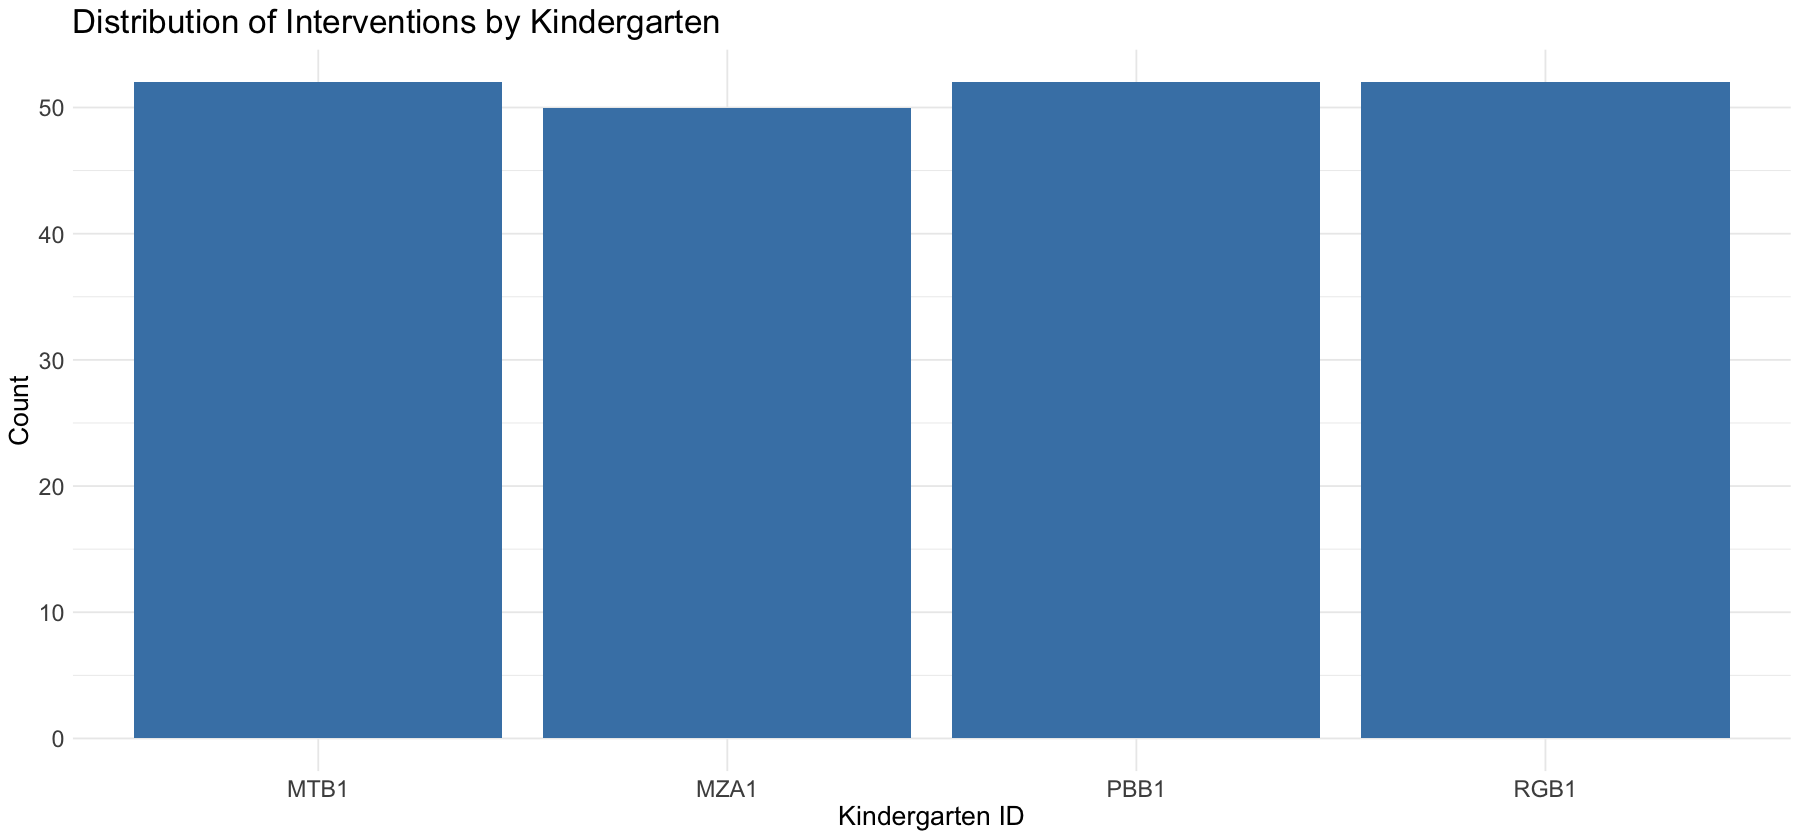

In [15]:
# Distribution of interventions by kindergarten
# Bar plot to show how many interventions were conducted in each kindergarten
ggplot(int, aes(x = kindergarten_ID)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Interventions by Kindergarten",
       x = "Kindergarten ID",
       y = "Count") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  )

The bar plot illustrates the distribution of interventions across four kindergartens: MTB1, MZA1, PBB1, and RGB1. Each bar represents the total number of interventions conducted in each kindergarten. From the plot, we can observe that the number of interventions is relatively uniform across all kindergartens, with each conducting around the same number of interventions (approximately 50). This indicates a balanced implementation of the intervention program across the different kindergartens involved in the study.

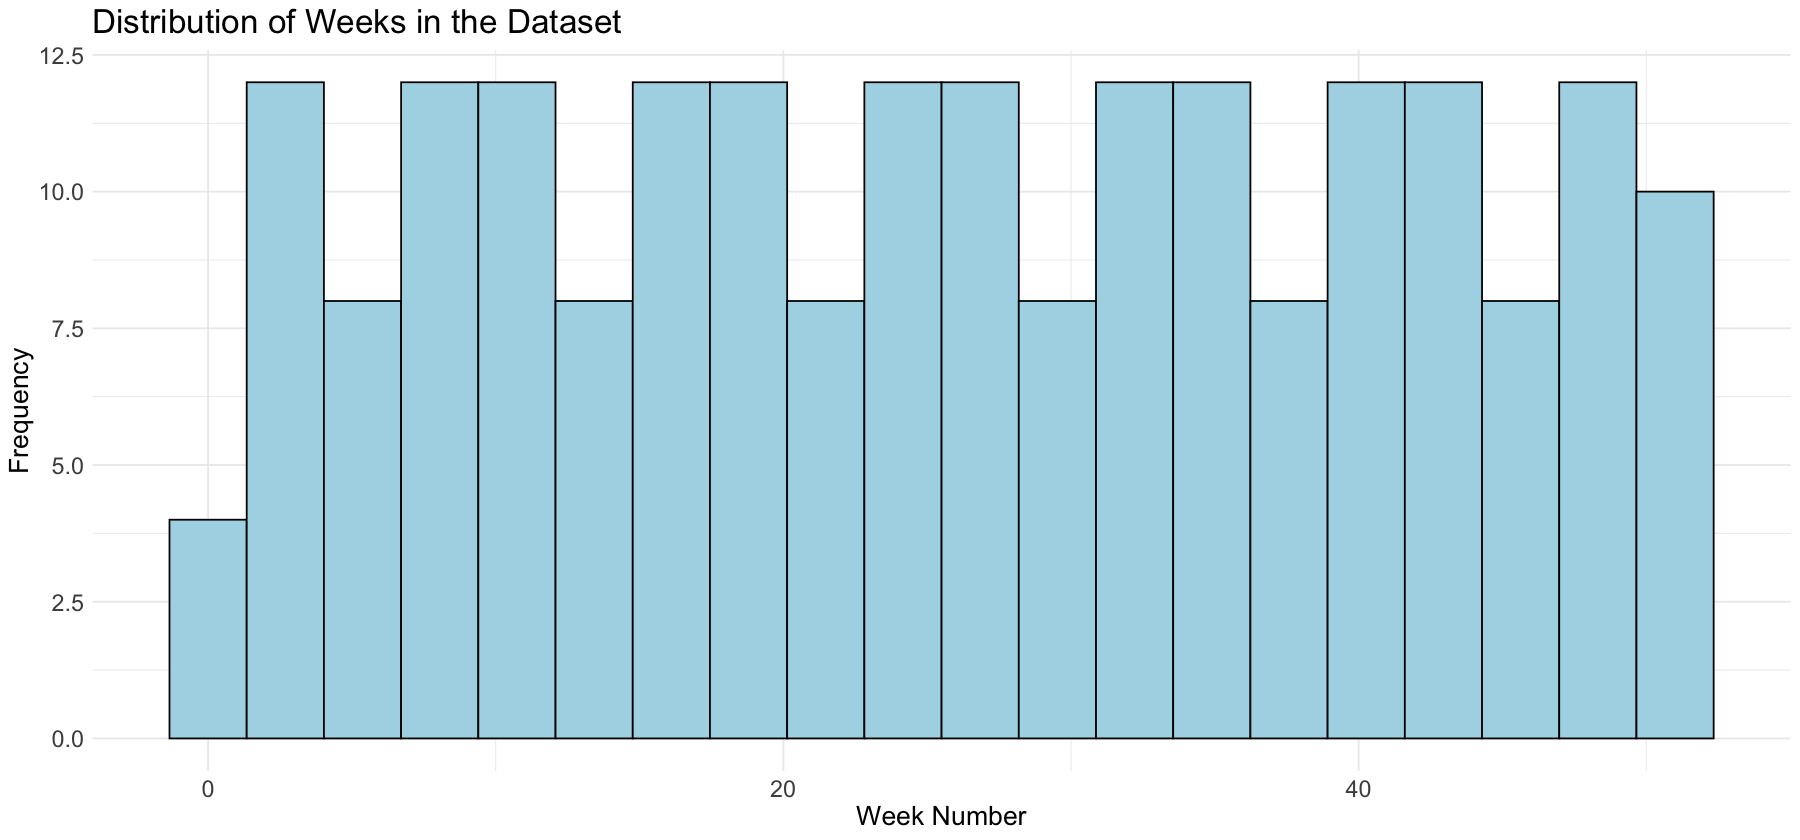

In [16]:
# Distribution of weeks
# Histogram of the number of weeks included in the dataset
ggplot(int, aes(x = week_number)) +
  geom_histogram(bins = 20, fill = "lightblue", color = "black") +
  labs(title = "Distribution of Weeks in the Dataset",
       x = "Week Number",
       y = "Frequency") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  )

The histogram illustrates the distribution of weeks in the dataset, representing the number of weeks across which interventions were recorded. The x-axis indicates the week number (ranging from 0 to around 53), while the y-axis represents the frequency or count of occurrences for each week. The distribution shows a relatively even spread of weeks, with the frequency of interventions being consistent across most weeks. However, there is a slight dip in activity at the beginning (week 0) and toward the end (weeks 50-53), indicating fewer interventions recorded during these time frames. This could suggest a slower start and reduced activity as the intervention period progressed, or it may reflect variations in data collection.

# 4-Visualization
[Back to Table of Content](#table-of-content)

In [17]:
# Select the necessary columns first, including the intervention applications and the prefixes
selected_columns <- int %>%
  select(kindergarten_ID, week_number, water_applications, herbs, exercise, nutrition, order_of_life,
         starts_with("AD_PS"), starts_with("AD_E"), starts_with("AD_C"))


In [18]:
# Summarize the counts for each kindergarten and week, including zeros
summary_table <- selected_columns %>%
  dplyr::group_by(kindergarten_ID, week_number) %>%
  dplyr::summarize(across(everything(), \(x) sum(x, na.rm = TRUE)), .groups = "drop")

In [19]:
# Reshape the data to include all intervention categories (water_applications, herbs, etc. and AD_PS, AD_E, AD_C)
heatmap_data <- selected_columns %>%
  dplyr::select(kindergarten_ID, week_number, water_applications, herbs, exercise, nutrition, order_of_life,
                starts_with("AD_PS"), starts_with("AD_E"), starts_with("AD_C")) %>%
  group_by(kindergarten_ID, week_number) %>%
  dplyr::summarize(across(everything(), \(x) sum(x, na.rm = TRUE)), .groups = "drop")


In [20]:
# Reshape the data to long format for ggplot
heatmap_data_melt <- melt(heatmap_data, id.vars = c("kindergarten_ID", "week_number"))

In [21]:
# Reverse the order of the y-axis (interventions)
heatmap_data_melt$variable <- factor(heatmap_data_melt$variable, levels = rev(unique(heatmap_data_melt$variable)))


In [22]:
unique(heatmap_data_melt$variable)

[1] water_applications      herbs                   exercise               
 [4] nutrition               order_of_life           AD_PS_arm_pouring      
 [7] AD_PS_foot_pouring      AD_PS_face_pouring      AD_PS_hand_bath        
[10] AD_PS_arm_bath          AD_PS_foot_bath         AD_PS_knee_pouring     
[13] AD_PS_leg_pouring       AD_PS_dew_snow_treading AD_PS_air_bath         
[16] AD_PS_alternating_bath  AD_E_arm_pouring        AD_E_foot_pouring      
[19] AD_E_face_pouring       AD_E_hand_bath          AD_E_arm_bath          
[22] AD_E_foot_bath          AD_E_knee_pouring       AD_E_leg_pouring       
[25] AD_E_dew_snow_treading  AD_E_air_bath           AD_E_alternating_bath  
[28] AD_C_arm_pouring        AD_C_foot_pouring       AD_C_face_pouring      
[31] AD_C_hand_bath          AD_C_arm_bath           AD_C_foot_bath         
[34] AD_C_knee_pouring       AD_C_leg_infusion       AD_C_dew_snow_treading 
[37] AD_C_air_bath           AD_C_alternating_bath  
38 Levels: AD_C_alternating_bath AD_C_air_bath ... water_applications

In [23]:
# Remove prefixes and sum values by kindergarten_ID, week_number, and new variable name
heatmap_data_aggregated <- heatmap_data_melt %>%
  mutate(variable = gsub("^(AD_PS_|AD_E_|AD_C_)", "", variable)) %>%
  group_by(kindergarten_ID, week_number, variable) %>%
  dplyr::summarise(value = sum(value, na.rm = TRUE), .groups = "drop")

# Check the first rows of the aggregated data
unique(heatmap_data_aggregated$variable)

[1] "air_bath"           "alternating_bath"   "arm_bath"          
 [4] "arm_pouring"        "dew_snow_treading"  "exercise"          
 [7] "face_pouring"       "foot_bath"          "foot_pouring"      
[10] "hand_bath"          "herbs"              "knee_pouring"      
[13] "leg_infusion"       "leg_pouring"        "nutrition"         
[16] "order_of_life"      "water_applications"

In [24]:
# Define a mapping for renaming variables
rename_map <- c(
  "air_bath" = "Air bath",
  "alternating_bath" = "Alternating bath",
  "arm_bath" = "Arm bath",
  "arm_pouring" = "Arm pouring",
  "dew_snow_treading" = "Dew or snow treading",
  "exercise" = "Exercise",
  "face_pouring" = "Face pouring",
  "foot_bath" = "Foot bath",
  "foot_pouring" = "Foot Pouring",
  "hand_bath" = "Hand Bath",
  "herbs" = "Herbs",
  "knee_pouring" = "Knee pouring",
  "leg_infusion" = "Leg infusion",
  "leg_pouring" = "Leg Pouring",
  "nutrition" = "Nutrition",
  "water_applications" = "Water applications"
)

In [25]:
# Apply renaming and remove "order_of_life"
heatmap_data_aggregated <- heatmap_data_aggregated %>%
  filter(variable != "order_of_life") %>%
  mutate(variable = recode(variable, !!!rename_map))

In [26]:
# Set plot size for the notebook
options(repr.plot.width = 20, repr.plot.height = 5)

In [27]:
# Step 1: Rename kindergarten_IDs
heatmap_data_aggregated <- heatmap_data_aggregated %>%
  mutate(kindergarten_ID = recode(kindergarten_ID,
    "MTB1" = "WCB",
    "MZA1" = "EDB",
    "PBB1" = "ECB",
    "RGB1" = "SBA"
  ))

In [28]:
# Compute the total count per intervention for sorting
intervention_order <- heatmap_data_aggregated %>%
  dplyr::group_by(variable) %>%
  dplyr::summarise(total_count = sum(value, na.rm = TRUE)) %>%
  arrange(total_count) %>%
  pull(variable)  # Extract sorted intervention names

In [29]:
# Update the factor levels of "variable" to reflect this order
heatmap_data_aggregated$variable <- factor(heatmap_data_aggregated$variable, levels = intervention_order)

# Define custom colors for facet strip labels
heatmap_colors <- c(
  "MTB" = "#a6cee3",
  "MZA" = "#1f78b4",
  "PBB" = "#b2df8a",
  "RGB" = "#33a02c"
)

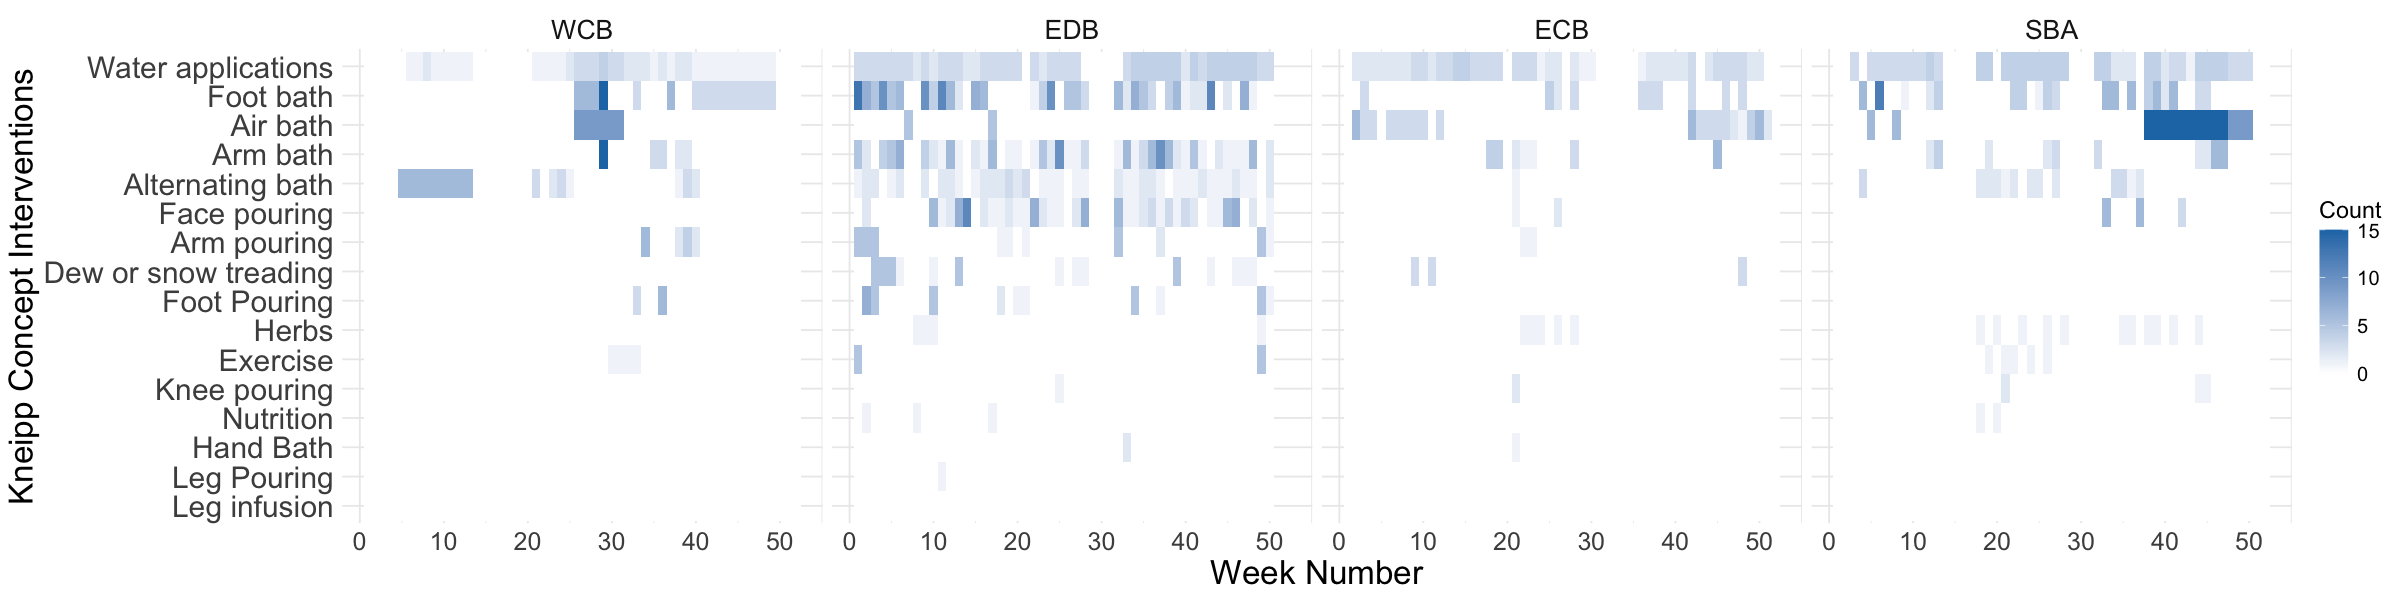

In [30]:
# Create the heatmap with sorted interventions and colored groups
heatmap_plot <- ggplot(heatmap_data_aggregated, aes(x = week_number, y = variable, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "#1f78b4") +
  labs(
       x = "Week Number",
       y = "Kneipp Concept Interventions",
       fill = "Count"
  ) +
  theme_minimal() +
  theme(
    axis.title.y = element_text(size = 20),  # Increased font size for y label
    axis.title.x = element_text(size = 20),  # Increased font size for x label
    axis.text.y = element_text(size = 18),   # Increased font size for intervention names
    axis.text.x = element_text(size = 15),   # Increased font size for week numbers
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    strip.text = element_text(size = 16)  # Differentiate kindergarten labels
  ) +
  facet_wrap(~ kindergarten_ID, ncol = 4)  # Arrange in a 1x4 layout

# Print the updated heatmap
print(heatmap_plot)


The heatmap visualizes the frequency of various interventions carried out across four kindergartens: MTB1, MZA1, PBB1, and RGB1, over 52 weeks. The interventions are categorized into general categories such as water applications, herbs, exercise, and nutrition, as well as more specific applications categorized as AD_PS (preschool), AD_E (elementary), and AD_C (crib).

In general, the intensity of the color in the heatmap indicates how frequently an intervention was applied, with darker shades signifying higher counts and lighter shades representing fewer interventions. MZA1 consistently shows the highest number of interventions, with dark blue shades across multiple categories. MTB1 and PBB1, in contrast, demonstrate fewer interventions, as seen by the lighter shades. RGB1, although less active than MZA1, shows some clusters of intervention activity.

Looking at specific intervention categories, water applications are more frequently observed in MZA1, especially in the first half of the year (weeks 1–30). MTB1, PBB1, and RGB1 show lighter activity in this category, with fewer water applications. Exercise and nutrition interventions, on the other hand, appear sporadically across all kindergartens, without a clear pattern or high frequency. The order of life intervention is minimally applied across all kindergartens.

Within the AD_PS, AD_E, and AD_C categories, the level of intervention also varies. MZA1 stands out for its higher number of interventions, particularly in AD_PS applications during weeks 5–25, where face pouring and foot pouring are more prominent. RGB1 exhibits clusters of interventions, particularly in the AD_C (crib) and AD_PS (preschool) categories, though these interventions occur less frequently compared to MZA1.

Kindergarten-specific trends show MZA1 as the most active kindergarten overall, particularly in water applications and specific AD_PS and AD_C interventions. The activity in MZA1 peaks around weeks 10–30. In contrast, MTB1 shows less frequent interventions, with scattered activities mainly in the middle and later weeks. PBB1 also demonstrates sporadic intervention usage, with limited activity across the categories, including some water applications. RGB1 exhibits moderate activity, with visible clusters of interventions between weeks 20 and 40, mainly in the AD_C category.

Regarding temporal trends, the data shows that kindergartens such as MZA1 and RGB1 are more active in the first half of the year, with intervention frequency declining in the second half. After week 40, the overall intervention activity decreases across most kindergartens, suggesting potential seasonal or program-related factors influencing the reduction in activity.

This analysis highlights significant differences in the frequency and timing of interventions across the four kindergartens, with MZA1 being notably more active than the others. The variations between kindergartens may reflect differences in how they implement the intervention program, possibly influenced by available resources or differing approaches to the Kneipp concept.

In [31]:
# Define the path for saving the graphs and save them
graph_path <- paste0(path, "/graphs")

ggsave(paste0(graph_path, "/intervention_heatmaps.eps"), plot = heatmap_plot, device = "eps", width = 20, height = 5)
ggsave(paste0(graph_path, "/intervention_heatmaps.pdf"), plot = heatmap_plot, device = "pdf", width = 20, height = 5)

# 5-General Conclusion
[Back to Table of Content](#table-of-content)

The analysis provides a descriptive overview of the Kneipp intervention program implemented across four kindergartens (MTB1, MZA1, PBB1, and RGB1) over the course of 52 weeks. By exploring the dataset, we were able to uncover patterns and trends regarding how often and when different interventions were conducted.

**Kindergarten-Specific Intervention Frequencies:**
MZA1 consistently stands out as the kindergarten with the highest number of interventions, especially when compared to the other kindergartens. The intensity of activities in MZA1 is significantly higher, particularly in the early part of the year (weeks 1–30). Water applications and other specific AD_PS (preschool) interventions, such as face pouring and foot pouring, are frequently applied here.
In contrast, MTB1 and PBB1 show fewer overall interventions throughout the year, with lighter activity across most categories. Their interventions appear sporadic, with less consistency in the application of the Kneipp principles. RGB1, while more active than MTB1 and PBB1, still conducts fewer interventions than MZA1. However, RGB1 shows visible clusters of interventions during specific weeks, particularly around weeks 20–40, primarily in the AD_C (crib) category.

**Temporal Trends:**
The temporal analysis reveals that intervention activity is more concentrated in the first half of the year. In most kindergartens, the frequency of interventions tends to decline after week 40. This decline may indicate either a shift in program focus, seasonal effects, or resource limitations that occur in the later part of the year. MZA1’s intense activity during the early weeks may suggest a more structured or consistent approach to the Kneipp intervention.

**Specific Interventions:**
Water applications emerge as one of the more frequently used interventions, particularly in MZA1. Other interventions such as exercise, nutrition, and order of life show limited activity and do not display significant patterns across the kindergartens. The AD_PS, AD_E, and AD_C categories, which represent specific applications of the Kneipp concept (such as foot baths and air baths), also show varying levels of activity, with MZA1 again being the most active.

**Summary:**

Overall, the analysis highlights significant variability in how the Kneipp intervention was implemented across the four kindergartens. MZA1 is by far the most active kindergarten, both in terms of the frequency of interventions and the variety of specific applications conducted. The other kindergartens, particularly MTB1 and PBB1, show less frequent engagement with the interventions. RGB1 displays moderate activity with occasional clusters of interventions, but still falls behind MZA1 in overall intensity.